<a href="https://colab.research.google.com/github/YDj-robot/Financial-Analysis-Model-Stock-Return/blob/main/financial_analysis_v2_model_stock_return.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Models of Stock Return



## Importing META Historical Data from 2023-01-03 to 2023-08-24


In [45]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
meta = pd.read_csv("META_Jan_01_2023_Aug_24_2023.csv", index_col=0)
meta.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,122.820000,126.370003,122.279999,124.739998,124.739998,35528500
2023-01-04,127.379997,129.050003,125.849998,127.370003,127.370003,32397100
2023-01-05,126.129997,128.520004,124.540001,126.940002,126.940002,25447100
2023-01-06,128.970001,130.330002,126.040001,130.020004,130.020004,27584500
2023-01-09,131.160004,132.949997,129.279999,129.470001,129.470001,26649100


In [48]:
meta.shape

(161, 6)

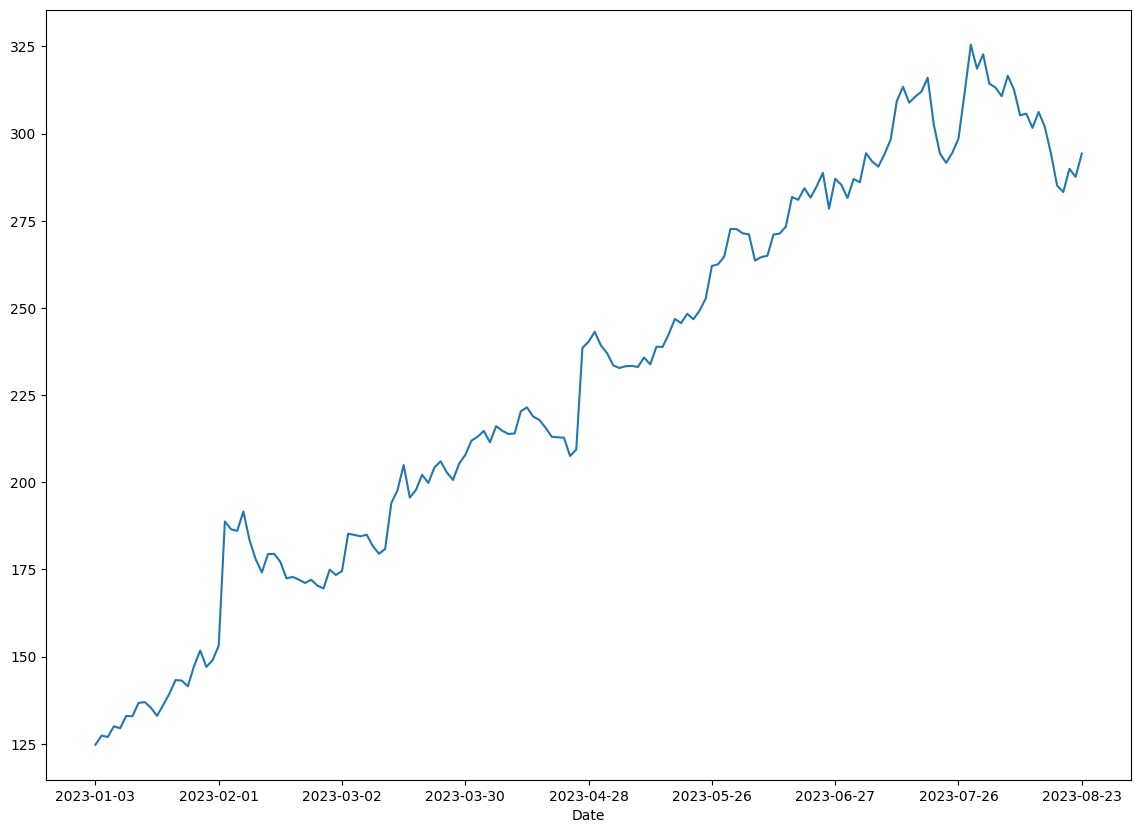

In [49]:
plt.figure(figsize=(14,10))
meta["Close"].plot()
plt.show()

## Distribution of Log return

###Calculating the log daily return

In [50]:
meta["LogReturn"] = np.log(meta["Close"]).shift(-1) - np.log(meta["Close"])
meta.head()

,Open,High,Low,Close,Adj Close,Volume,LogReturn
Date,,,,,,,
2023-01-03,122.820000,126.370003,122.279999,124.739998,124.739998,35528500,0.020865
2023-01-04,127.379997,129.050003,125.849998,127.370003,127.370003,32397100,-0.003382
2023-01-05,126.129997,128.520004,124.540001,126.940002,126.940002,25447100,0.023974
2023-01-06,128.970001,130.330002,126.040001,130.020004,130.020004,27584500,-0.004239
2023-01-09,131.160004,132.949997,129.279999,129.470001,129.470001,26649100,0.026825


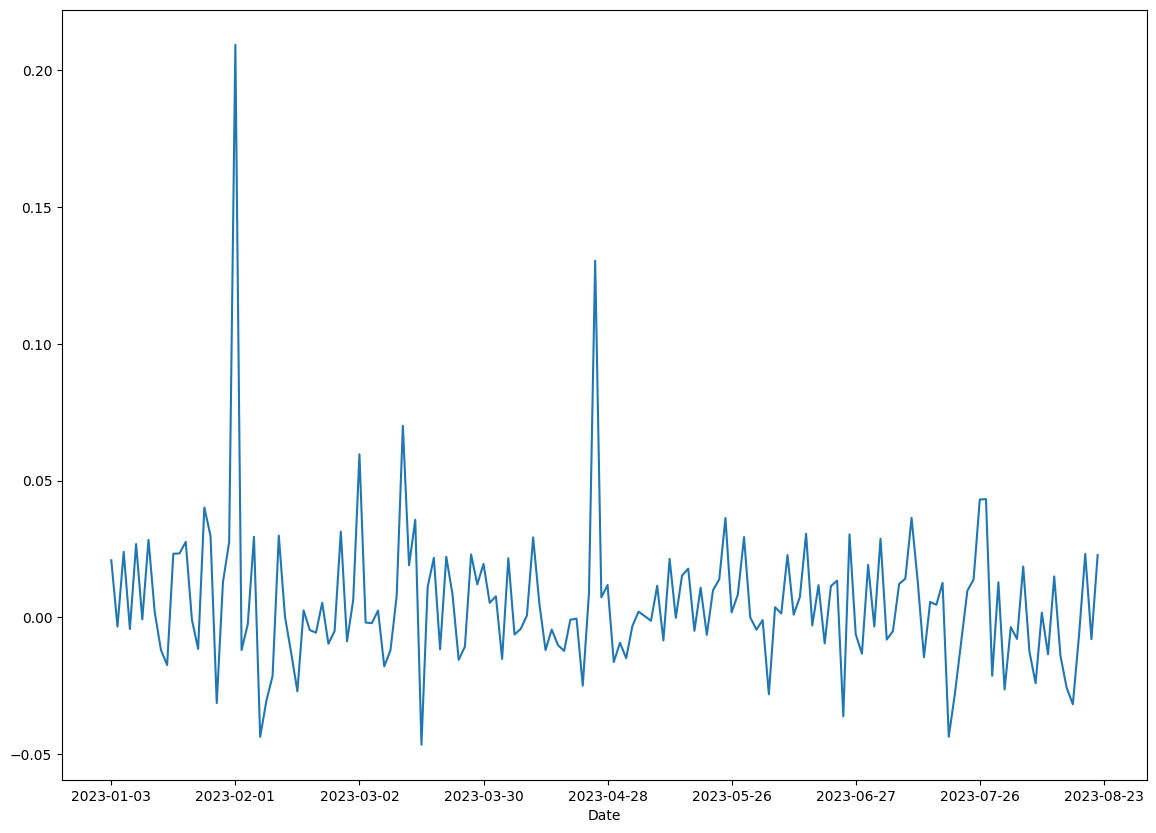

In [51]:
plt.figure(figsize=(14,10))
meta['LogReturn'].plot()
plt.show()

###Plot a histogram to show the distribution of log return of stock.

0.005363526073784508 0.027201053890255487


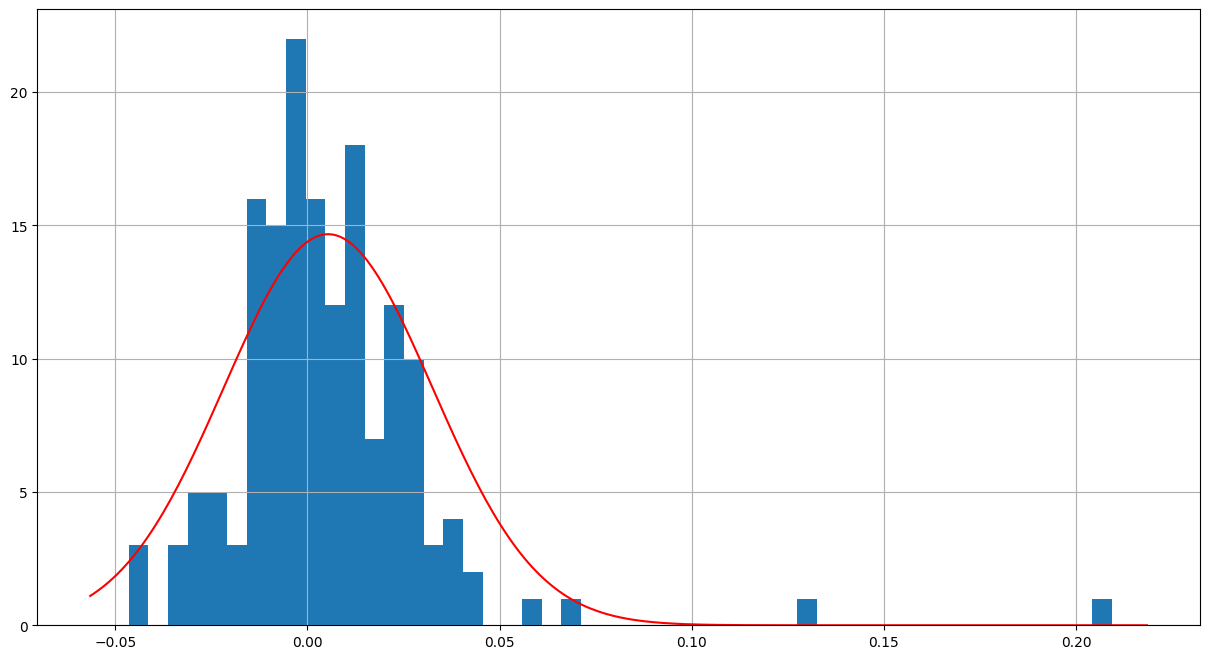

In [52]:
mu = meta['LogReturn'].mean()
sigma = meta['LogReturn'].std(ddof=1)
print(mu, sigma)

density = pd.DataFrame()
density['x'] = np.arange(meta['LogReturn'].min()-0.01, meta['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

meta['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

###Calculate the probability of the stock price will drop over a certain percentage in a day

####probability that the stock price of META will drop over 5% in a day

In [53]:
# probability that the stock price of meta will drop over 5% in a day
prob_return1 = norm.cdf(-0.05, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  0.02090809108980819


####probability that the stock price of META will drop over 10% in a day

In [54]:
# probability that the stock price of meta will drop over 10% in a day
prob_return2 = norm.cdf(-0.1, mu, sigma)
print('The Probability is ', prob_return2)

The Probability is  5.3639729437010095e-05


###Calculate the probability of the stock price will drop over a certain percentage in 100 days

####Drop over 40% in 100 days

In [55]:
mu100 = 100*mu
sigma100 = (100**0.5) * sigma
drop40 = norm.cdf(-0.4, mu100, sigma100)
print('The probability of dropping over 40% in 100 days is ', drop40)

The probability of dropping over 40% in 100 days is  0.00028835304637632854


####Drop over 20% in 100 days

In [56]:
mu100 = 100*mu
sigma100 = (100**0.5) * sigma
drop20 = norm.cdf(-0.2, mu100, sigma100)
print('The probability of dropping over 20% in 100 days is ', drop20)

The probability of dropping over 20% in 100 days is  0.0033939581392629834


## Calculate Value at risk (VaR)

###Value at risk(VaR)

In [57]:
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk ', VaR)

Single day value at risk  -0.0393782260745047


###Quatile

In [58]:
# 20% quantile
q20 =  norm.ppf(0.20, mu, sigma)
print('20% quantile ', q20)
# 80% quantile
q80 = norm.ppf(0.80, mu, sigma)
print('80% quantile ', q80)

20% quantile  -0.017529458455815633
80% quantile  0.028256510603384653


## Plot Quatile

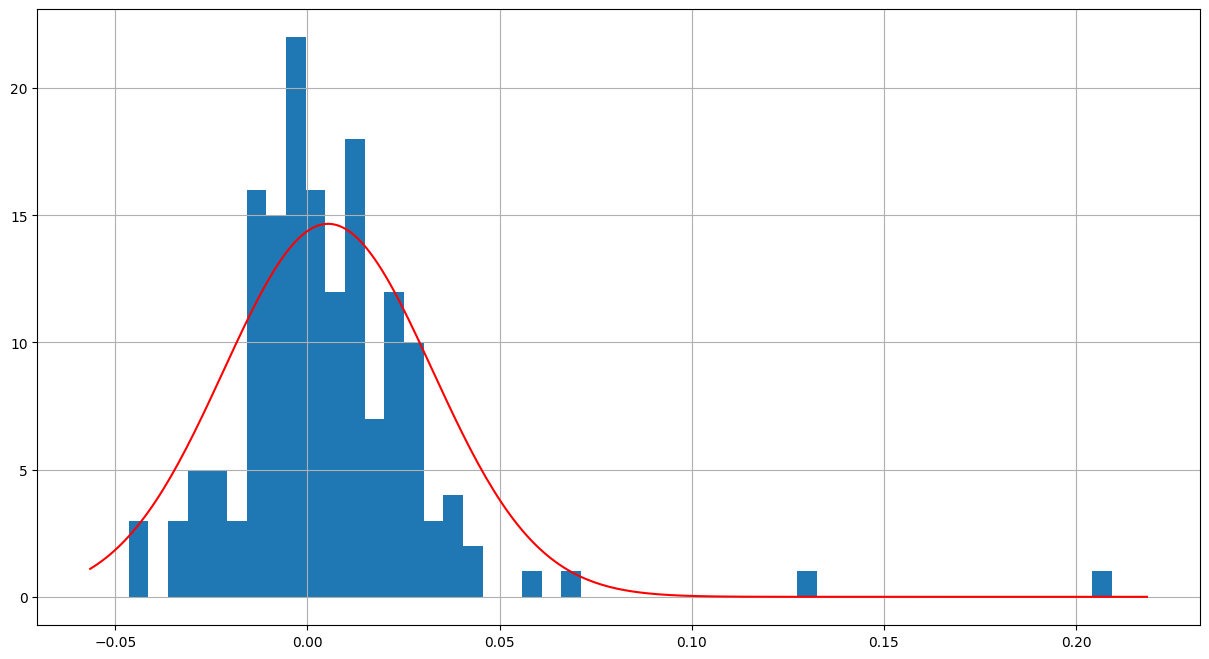

In [59]:
meta['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
x_index_20 = int((density['x'].shape[0] * 20 / 100) // 1)
x_index_80 = int((density['x'].shape[0] * 80 / 100) // 1)
plt.vlines(x = density['x'].iloc[x_index_20] , ymin = 0, ymax = q20,
          colors = 'red')
plt.vlines(x =density['x'].iloc[x_index_80], ymin = 0, ymax = q80,
          colors = 'red')
plt.show()